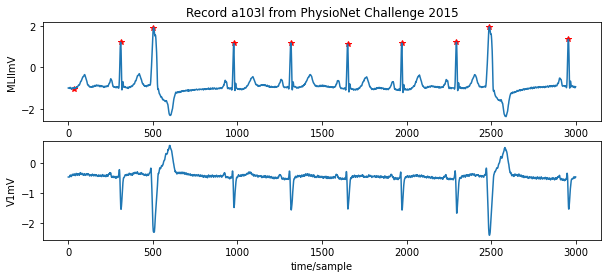

{'record_name': '119',
 'n_sig': 2,
 'fs': 360,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 3000,
 'base_time': None,
 'base_date': None,
 'comments': ['51 F 1129 654 x2', 'Pronestyl', 'The PVCs are uniform.'],
 'sig_name': ['MLII', 'V1'],
 'p_signal': array([[-0.995, -0.47 ],
        [-0.995, -0.47 ],
        [-0.995, -0.47 ],
        ...,
        [-0.955, -0.485],
        [-0.955, -0.465],
        [-0.935, -0.465]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['119.dat', '119.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [1024, 1024],
 'units': ['mV', 'mV'],
 'adc_res': [11, 11],
 'adc_zero': [1024, 1024],
 'init_value': [825, 930],
 'checksum': [60025, 38570],
 'block_size': [0, 0]}

In [15]:
import wfdb
from wfdb.plot import plot
sampfrom=0
sampto=3000
record = wfdb.rdrecord('../data/mit-bih/119', physical=True, sampfrom=sampfrom, sampto=sampto)

annotation = wfdb.rdann('../data/mit-bih/119', 'atr', sampfrom=sampfrom, sampto = sampto)

wfdb.plot_wfdb(record=record, annotation=annotation,title='Record a103l from PhysioNet Challenge 2015', figsize=(10,4)) 
display(record.__dict__)


In [23]:
record.p_signal

array([[-0.995, -0.47 ],
       [-0.995, -0.47 ],
       [-0.995, -0.47 ],
       ...,
       [-0.955, -0.485],
       [-0.955, -0.465],
       [-0.935, -0.465]])

In [18]:
signals, fields = wfdb.rdsamp('../data/mit-bih/100', channels=[14, 0, 5, 10], sampfrom=100, sampto=15000)
display(signals)
display(fields)

# Can also read the same files hosted on Physionet
# signals2, fields2 = wfdb.rdsamp('s0010_re', channels=[14, 0, 5, 10], sampfrom=100, sampto=15000, pn_dir='ptbdb/patient001/')

ValueError: Input channels must all be lower than the total number of channels